In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

In [4]:
mpl.rcParams["figure.figsize"] = (4,4)
mpl.rcParams["axes.grid"] = False

In [5]:
dataset = pd.read_csv("train_300k.csv")

Implementing the Logistic Regression Algorithm from scratch

In [7]:
# Defining the sigmoid function, which is at the heart of logistic regression

def sigmoid(input):
    return 1/(1 + np.exp(-input))

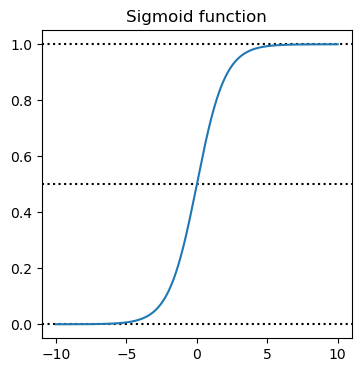

In [19]:
## Plotting the sigmoid function

inputs = np.linspace(-10,10,1000)
outputs = [sigmoid(_) for _ in inputs]
plt.axhline(1, color = "black", linestyle = "dotted")
plt.axhline(0.5, color = "black", linestyle = "dotted")
plt.axhline(0, color = "black", linestyle = "dotted")
plt.plot(inputs, outputs)
plt.title("Sigmoid function")
plt.show()

In [5]:
dataset.columns

Index(['Unnamed: 0', 'id', 'click', 'hour', 'C1', 'banner_pos', 'site_id',
       'site_domain', 'site_category', 'app_id', 'app_domain', 'app_category',
       'device_id', 'device_ip', 'device_model', 'device_type',
       'device_conn_type', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20',
       'C21'],
      dtype='object')

In [6]:
Y = dataset["click"]
X = dataset.drop(['id', 'click', 'hour', 'device_id', 'device_ip'], axis = 1)

In [7]:
## Taking the first 90% of datapoints as training data and the rest of datapoints as testing data

train_size = int(0.9*len(X))
X_train, y_train = X.iloc[:train_size, :], Y.iloc[:train_size]
X_test, y_test = X.iloc[train_size:, :], Y.iloc[train_size:]

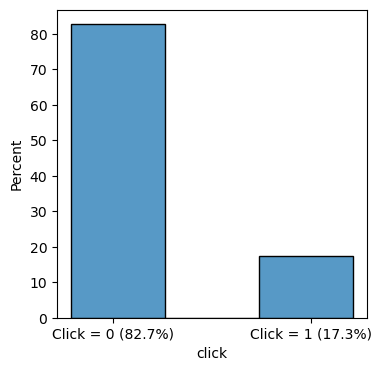

In [8]:
import seaborn as sns
ax = sns.histplot(y_train, bins = 3, stat = "percent")
click_counts = np.unique(y_train, return_counts = True)[1]
ax.set(xticks = [0.15, 0.85], xticklabels = [f"Click = 0 ({click_counts[0]/np.sum(click_counts)*100:.1f}%)", 
                                            f"Click = 1 ({click_counts[1]/np.sum(click_counts)*100:.1f}%)"])
plt.show()

From the above plot, we can see that the classes are imbalanced

In [9]:
## Using One Hot Encoder to transform all the categorical features into binary features

from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(handle_unknown= "ignore")
X_train = ohe.fit_transform(X_train)

In [10]:
# One Hot Encoding the test dataset
X_test = ohe.transform(X_test)